# Bioinformatics survey - skills analysis

In [1]:
from typing import Dict, List, Optional, Set

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

import sys
import os

The following notebook analyzes how theoretical and practical skills vary among the different italian universities offering bachelor's and/or master's degree courses in bioinformatics or closely related subjects.
<br>
The analyzed data come from a survey promoted by *RSG-Italy*, to collect the perception that italian students have about their bioinformatics' **skills level** and the **quality of skills teaching** offered by the different italian Universities. 
<br>
In our survey we considered both **hard (theoretical) and soft (practical) skills**, known to be fundamental in the everyday work of bioinformatics scientists.  

## Define path to data and constant variables

In [2]:
# paths
data_path = "./data"
# constant variables
SURVEY_CSV = "BioinformaticsSurvey2022.csv"

## Define functions used throughout the analysis

The following functions will be used throughout the notebook.

In [3]:
def compute_average_score(
    df: pd.DataFrame, elements: Set, term: str
) -> Dict[str, Dict[str, float]]:
    assert isinstance(df, pd.DataFrame)
    assert isinstance(elements, set)
    assert isinstance(term, str)
    score_dict = {}
    for e in elements:
        subset_e = df[df[term] == e]
        cols = subset_e.columns.tolist()[2:]
        score_dict[e] = {}
        for col in cols:
            avg_score = np.mean(
                [
                    int(val) 
                    for val in subset_e[col].tolist() 
                    if str(val) != "nan" 
                ]
            )
            score_dict[e][col] = avg_score
    return score_dict

In [4]:
def compute_mean_by_value(
    df: pd.DataFrame, values: Set, value: str, skillset: List[str]
) -> Dict[str, float]:
    assert isinstance(df, pd.DataFrame)
    assert isinstance(values, set)
    assert isinstance(value, str)
    assert isinstance(skillset, list)
    avgs_dict = {}
    for val in values:
        df_subset = df[df[value] == val]
        df_np = df_subset[skillset].to_numpy().astype(float)  # force to float
        df_np = df_np[np.logical_not(np.isnan(df_np))]
        avgs_dict[val] = df_np.mean()
    assert bool(avgs_dict)
    return avgs_dict

In [5]:
def plot_heatmap(df: pd.DataFrame) -> None:
    assert isinstance(df, pd.DataFrame)
    f, ax = plt.subplots(1, 1, figsize=(25,10))
    ax = sns.heatmap(
        df.T, 
        vmin=0, 
        vmax=5, 
        cmap="YlOrBr",
        ax=ax, 
        square=True, 
        linewidths=.5,
        linecolor="#090909",
    )
    ax.set_xticklabels(df.index.tolist(), fontsize=14)
    ax.set_yticklabels(df.columns.tolist(), fontsize=14)
    plt.show()

In [6]:
def plot_clustermap(df: pd.DataFrame) -> None:
    g = sns.clustermap(
        df.T, 
        vmin=0, 
        vmax=5,
        cmap="YlOrBr",
        figsize=(25,15)
    )
    x0, y0, w, h = g.cbar_pos
    g.ax_cbar.set_position([1, .5, w/2, h + 0.25])
    plt.show()

In [7]:
def plot_scatter_unique(
    elements_theoretical: Dict[str, float],
    elements_practical: Dict[str, float], 
    change: Optional[bool] = False
) -> None:
    assert isinstance(elements_theoretical, dict)
    assert isinstance(elements_practical, dict)
    assert elements_theoretical.keys() == elements_practical.keys()
    f, ax = plt.subplots(1, 1, figsize=(20, 10))
    ax.scatter(
        elements_theoretical.keys(),
        elements_theoretical.values(),
        color="#D46F05", 
        s=100, 
        alpha=.5,
        label="Theoretical disciplines",
    )
    ax.scatter(
        elements_practical.keys(),
        elements_practical.values(),
        color="#0A9D17", 
        s=100, 
        alpha=.5,
        label="Practical disciplines",
    )
    x_ticks = list(elements_theoretical.keys())
    if change:
        x_ticks[4] = "Foreign university"
    y_ticks = list(range(6))
    ax.set_xticklabels(x_ticks, rotation=75, fontsize=16)
    ax.set_yticklabels(y_ticks, rotation=0, fontsize=16)
    ax.set_ylim([0, 5])
    ax.legend(fontsize=16)
    plt.show()

In [8]:
def scatter_plot_single(
    elements: Dict[str, float], 
    avg_score: float, 
    title: str,
    change: Optional[bool] = False
) -> None:
    assert isinstance(elements, dict)
    assert isinstance(avg_score, float)
    assert isinstance(title, str)
    f, ax = plt.subplots(1, 1, figsize=(20, 10))
    ax.scatter(
        elements.keys(), elements.values(), color="#D46F05", s=100, alpha=.5
    )
    x_ticks = list(elements.keys())
    if change:
        x_ticks[4] = "Foreign university"
    y_ticks = list(range(6))
    ax.set_xticklabels(x_ticks, rotation=75, fontsize=16)
    ax.set_yticklabels(y_ticks, rotation=0, fontsize=16)
    ax.set_ylim([0, 5])
    ax.axhline(avg_score, color="#090909", linestyle="dashed")
    ax.set_title(title, size=20)
    plt.show()

## Start the analysis

We begin by loading the complete survey dataset.

In [9]:
survey = pd.read_csv(os.path.join(data_path, SURVEY_CSV))
survey.head()

,Timestamp,How old are you?,What are your pronouns?,Where are you from?,Where in Italy are you studying/did you study?,Are you an off-site student?,What is your current position?,Is bioinformatics the main focus of your studies?,What is your current degree area? Please select the closest answer that applies.,Have you ever heard about bioinformatics?,...,"On a scale of 1 (very improbable) to 5 (most likely), where would you like to work when you finish your training as a bioinformatician? [Science Communication]","On a scale of 1 (very improbable) to 5 (most likely), where would you like to work when you finish your training as a bioinformatician? [Teaching]","On a scale of 1 (very improbable) to 5 (most likely), where would you like to work when you finish your training as a bioinformatician? [Entrepreneurship]","On a scale of 1 (very improbable) to 5 (most likely), where would you like to work when you finish your training as a bioinformatician? [Editorial and publishing services]",Where in the world do you see yourself working? Select one or multiple answers.,Do you think that a mentoring program could help you in better design your career path?,How did you come across this survey?,Had you heard about ISCB before this survey?,Had you heard about RSG-Italy before this survey?,Your comments/advice:
0,2022/03/24 4:42:29 pm CET,23-26,He/him,"Northern-West Italy (Valle d'Aosta, Liguria, L...","Northern-West Italy (Valle d'Aosta, Liguria, L...",No,Master's student,Yes,NaN,NaN,...,1.0,1.0,1.0,1.0,Italy;Europe;North America,"Yes, I feel confused about job opportunities",RSG-Italy Telegram channel,Yes,Yes,NaN
1,2022/03/24 4:44:54 pm CET,23-26,He/him,"Northern-East Italy (Trentino-Alto Adige, Vene...","Northern-East Italy (Trentino-Alto Adige, Vene...",Yes,Master's student,No,Computer Science,"Yes, I'm familiar with the term",...,NaN,NaN,NaN,NaN,NaN,NaN,RSG-Italy Telegram channel,No,Yes,"In my opinion, there should be more bachelors ..."
2,2022/03/24 4:52:42 pm CET,23-26,He/him,"Northern-West Italy (Valle d'Aosta, Liguria, L...","Northern-East Italy (Trentino-Alto Adige, Vene...",No,PhD student (either in academia or industry),Yes,NaN,NaN,...,4.0,3.0,3.0,3.0,Italy;Europe;North America,"No, I think I will figure it out as I gain exp...",From friends/colleagues,Yes,Yes,NaN
3,2022/03/24 4:54:39 pm CET,23-26,She/her,"Southern Italy (Abruzzo, Molise, Campania, Pug...","Northern-East Italy (Trentino-Alto Adige, Vene...",Yes,Master's student,Yes,NaN,NaN,...,1.0,2.0,2.0,1.0,Italy;Europe;North America;Oceania,"Yes, I feel confused about job opportunities",RSG-Italy Telegram channel,Yes,Yes,NaN
4,2022/03/24 5:08:20 pm CET,27-30,He/him,"Northern-East Italy (Trentino-Alto Adige, Vene...","Northern-East Italy (Trentino-Alto Adige, Vene...",No,PhD student (either in academia or industry),Yes,NaN,NaN,...,1.0,1.0,3.0,1.0,Europe;North America,"No, I think I will figure it out as I gain exp...",RSG-Italy Telegram channel,Yes,Yes,NaN


Let's now subset the complete dataset to keep only variables regarding soft and hard skills.

In [10]:
# subset the survey to consider only skills data
survey_skills = survey.iloc[:, [25, 26] + list(range(36, 62))]
# rename skill columns
cols = survey_skills.columns.tolist()
skill_cols = cols[2:]
columns = [col.split("[")[1].replace("]", "") for col in skill_cols]
survey_skills.columns = ["University", "Degree class"] + columns
survey_skills.head()


,University,Degree class,"Bioinformatics algorithms (Genome assembly, alignment, variant calling, …)",Analysis of genomics data,Analysis of transcriptomics data,Analysis of proteomics data,Analysis of metabolomics data,Structural bioinformatics,Database development,Microscopy and imaging data analysis,...,SQL/NoSQL database development,High Performance Computing cluster usage,LINUX environment usage,"Version control systems usage (GitHub, GitLab, …)","Workflow languages (Nextflow, Snakemake, WDL, …)","Containers usage (Docker, Singularity, …)","Package management systems (Conda, …)","IDE usage (Visual Studio Code, Pycharm, RStudio, …)",Statistical/Benchmarking analyses,Data FAIRness
0,University of Milano La Statale,"LM-8 Biotecnologie industriali (Trento, Milano)","do not know, I have not finished my studies yet","do not know, I have not finished my studies yet","do not know, I have not finished my studies yet","do not know, I have not finished my studies yet","do not know, I have not finished my studies yet","do not know, I have not finished my studies yet","do not know, I have not finished my studies yet",5,...,"I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet"
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,University of Verona,Other,3,4,2,4,1,2,3,2,...,3,4,5,2,1,2,2,1,3,2
3,University of Trento,"LM-8 Biotecnologie industriali (Trento, Milano)",5,5,4,4,3,4,1,2,...,"I do not know, I have not finished my studies yet",1,2,1,1,1,1,5,3,1
4,University of Milano La Statale,L-02 Biotecnologie (Rome La Sapienza),2,2,2,2,2,2,2,2,...,2,3,3,2,2,2,2,2,2,2


Now we remove those rows with ```NaN``` values on skills variables.

In [11]:
# remove rows with all nan values
survey_skills.dropna(axis=0, how="all", inplace=True)
survey_skills.reset_index(drop=True, inplace=True)
survey_skills.head()

/Users/manuel/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,University,Degree class,"Bioinformatics algorithms (Genome assembly, alignment, variant calling, …)",Analysis of genomics data,Analysis of transcriptomics data,Analysis of proteomics data,Analysis of metabolomics data,Structural bioinformatics,Database development,Microscopy and imaging data analysis,...,SQL/NoSQL database development,High Performance Computing cluster usage,LINUX environment usage,"Version control systems usage (GitHub, GitLab, …)","Workflow languages (Nextflow, Snakemake, WDL, …)","Containers usage (Docker, Singularity, …)","Package management systems (Conda, …)","IDE usage (Visual Studio Code, Pycharm, RStudio, …)",Statistical/Benchmarking analyses,Data FAIRness
0,University of Milano La Statale,"LM-8 Biotecnologie industriali (Trento, Milano)","do not know, I have not finished my studies yet","do not know, I have not finished my studies yet","do not know, I have not finished my studies yet","do not know, I have not finished my studies yet","do not know, I have not finished my studies yet","do not know, I have not finished my studies yet","do not know, I have not finished my studies yet",5,...,"I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet","I do not know, I have not finished my studies yet"
1,University of Verona,Other,3,4,2,4,1,2,3,2,...,3,4,5,2,1,2,2,1,3,2
2,University of Trento,"LM-8 Biotecnologie industriali (Trento, Milano)",5,5,4,4,3,4,1,2,...,"I do not know, I have not finished my studies yet",1,2,1,1,1,1,5,3,1
3,University of Milano La Statale,L-02 Biotecnologie (Rome La Sapienza),2,2,2,2,2,2,2,2,...,2,3,3,2,2,2,2,2,2,2
4,University of Trento,"LM-8 Biotecnologie industriali (Trento, Milano)",4,3,2,1,1,3,2,1,...,1,2,4,2,1,1,4,2,2,1


Among the available options there was the following answer:<br>
- "I do not know, I have not finished my studies yet" 

For simplicity let's consider these answers like they are ```NaN```. This could be done since they do not provide informative values, used in the foloowing analysis.

In [12]:
# change str answers to nan
def convert_to_nan(row: pd.Series) -> pd.Series:
    row[row == "I do not know, I have not finished my studies yet"] = np.nan
    row[row == "do not know, I have not finished my studies yet"] = np.nan
    return row
survey_skills = survey_skills.apply(lambda x : convert_to_nan(x), axis=0)
survey_skills.head()

,University,Degree class,"Bioinformatics algorithms (Genome assembly, alignment, variant calling, …)",Analysis of genomics data,Analysis of transcriptomics data,Analysis of proteomics data,Analysis of metabolomics data,Structural bioinformatics,Database development,Microscopy and imaging data analysis,...,SQL/NoSQL database development,High Performance Computing cluster usage,LINUX environment usage,"Version control systems usage (GitHub, GitLab, …)","Workflow languages (Nextflow, Snakemake, WDL, …)","Containers usage (Docker, Singularity, …)","Package management systems (Conda, …)","IDE usage (Visual Studio Code, Pycharm, RStudio, …)",Statistical/Benchmarking analyses,Data FAIRness
0,University of Milano La Statale,"LM-8 Biotecnologie industriali (Trento, Milano)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,University of Verona,Other,3,4,2,4,1,2,3,2,...,3,4,5,2,1,2,2,1,3,2
2,University of Trento,"LM-8 Biotecnologie industriali (Trento, Milano)",5,5,4,4,3,4,1,2,...,NaN,1,2,1,1,1,1,5,3,1
3,University of Milano La Statale,L-02 Biotecnologie (Rome La Sapienza),2,2,2,2,2,2,2,2,...,2,3,3,2,2,2,2,2,2,2
4,University of Trento,"LM-8 Biotecnologie industriali (Trento, Milano)",4,3,2,1,1,3,2,1,...,1,2,4,2,1,1,4,2,2,1


To not bias our analysis, we decided to remove data regarding those universities and degree classes with less than four answers.

In [13]:
# remove universities with less than 4 answers
universities = set(survey_skills["University"].tolist())
remove_unis = [
    uni 
    for uni in universities 
    if survey_skills[survey_skills["University"] == uni].shape[0] < 4
]
survey_skills_uni = survey_skills.copy()
survey_skills_uni = survey_skills_uni[~survey_skills_uni["University"].isin(remove_unis)]
survey_skills_uni.reset_index(drop=True, inplace=True)
survey_skills_uni.head()

,University,Degree class,"Bioinformatics algorithms (Genome assembly, alignment, variant calling, …)",Analysis of genomics data,Analysis of transcriptomics data,Analysis of proteomics data,Analysis of metabolomics data,Structural bioinformatics,Database development,Microscopy and imaging data analysis,...,SQL/NoSQL database development,High Performance Computing cluster usage,LINUX environment usage,"Version control systems usage (GitHub, GitLab, …)","Workflow languages (Nextflow, Snakemake, WDL, …)","Containers usage (Docker, Singularity, …)","Package management systems (Conda, …)","IDE usage (Visual Studio Code, Pycharm, RStudio, …)",Statistical/Benchmarking analyses,Data FAIRness
0,University of Milano La Statale,"LM-8 Biotecnologie industriali (Trento, Milano)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,University of Verona,Other,3,4,2,4,1,2,3,2,...,3,4,5,2,1,2,2,1,3,2
2,University of Trento,"LM-8 Biotecnologie industriali (Trento, Milano)",5,5,4,4,3,4,1,2,...,NaN,1,2,1,1,1,1,5,3,1
3,University of Milano La Statale,L-02 Biotecnologie (Rome La Sapienza),2,2,2,2,2,2,2,2,...,2,3,3,2,2,2,2,2,2,2
4,University of Trento,"LM-8 Biotecnologie industriali (Trento, Milano)",4,3,2,1,1,3,2,1,...,1,2,4,2,1,1,4,2,2,1


After we completed the dataset cleaning and filtering, we can start we our analysis. 
<br>
Let's begin by computing the average score of each skill (both hard and soft), for each university. We recall that we removed data regarding those universities with less than four answers.

In [14]:
# compute average score per affiliation
universities = set(survey_skills_uni["University"].tolist())
survey_skills_uni = pd.DataFrame(compute_average_score(survey_skills_uni, universities, "University"))
survey_skills_uni

,Other Italian university,University of Milano La Statale,University of Roma Tor Vergata,"I’m doing my bachelor’s, master’s, or PhD programme abroad",University of Trento,University of Milano Bicocca,I’m not currently studying,University of Bari,University of Verona,University of Salerno,University of Bologna
"Bioinformatics algorithms (Genome assembly, alignment, variant calling, …)",3.400000,3.117647,3.500000,3.571429,3.615385,1.75,2.500000,3.785714,3.652174,3.500000,3.40
Analysis of genomics data,4.000000,3.411765,3.000000,3.285714,3.692308,1.50,2.666667,3.785714,3.391304,3.000000,3.00
Analysis of transcriptomics data,3.428571,3.647059,2.800000,3.571429,3.615385,1.50,2.666667,3.642857,3.000000,2.750000,2.40
Analysis of proteomics data,2.714286,2.352941,2.625000,2.285714,2.076923,1.50,2.333333,3.000000,2.863636,3.750000,1.80
Analysis of metabolomics data,3.000000,1.941176,1.875000,1.714286,2.076923,1.50,2.000000,2.642857,2.428571,2.750000,1.20
Structural bioinformatics,3.333333,2.529412,3.600000,2.571429,2.769231,2.00,3.166667,3.357143,3.043478,4.000000,3.50
Database development,3.428571,2.294118,2.857143,1.428571,1.923077,1.25,2.333333,3.714286,3.833333,3.500000,1.80
Microscopy and imaging data analysis,3.500000,2.312500,2.250000,1.428571,1.846154,1.25,1.833333,4.153846,3.000000,1.500000,1.20
Network & systems biology,3.142857,2.647059,2.800000,2.428571,3.000000,1.50,2.833333,2.857143,2.750000,2.500000,2.00
Phylogenetics,2.714286,2.250000,2.125000,2.285714,2.615385,1.75,2.666667,2.416667,2.714286,1.750000,2.80


Let's now plot a heatmap, showing for each university which the average score for each skill.

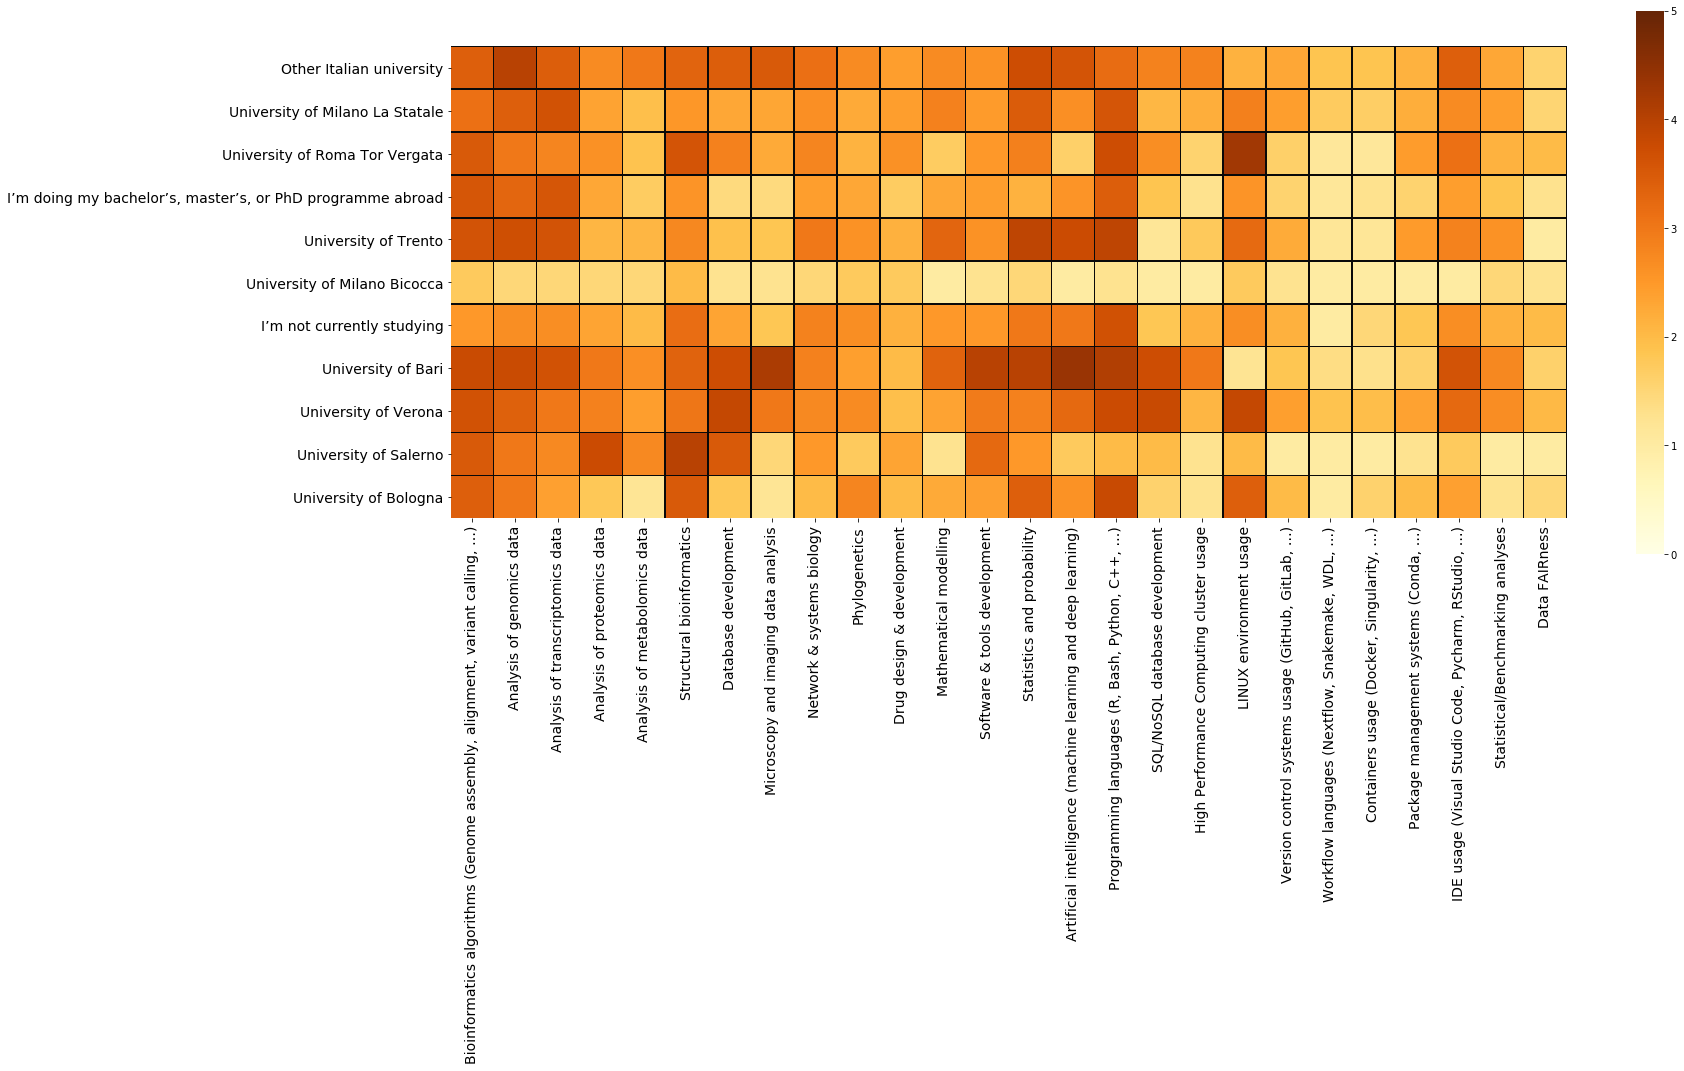

In [15]:
plot_heatmap(survey_skills_uni)

Let's also to push further our analysis, by searching for potential clusters in our data.

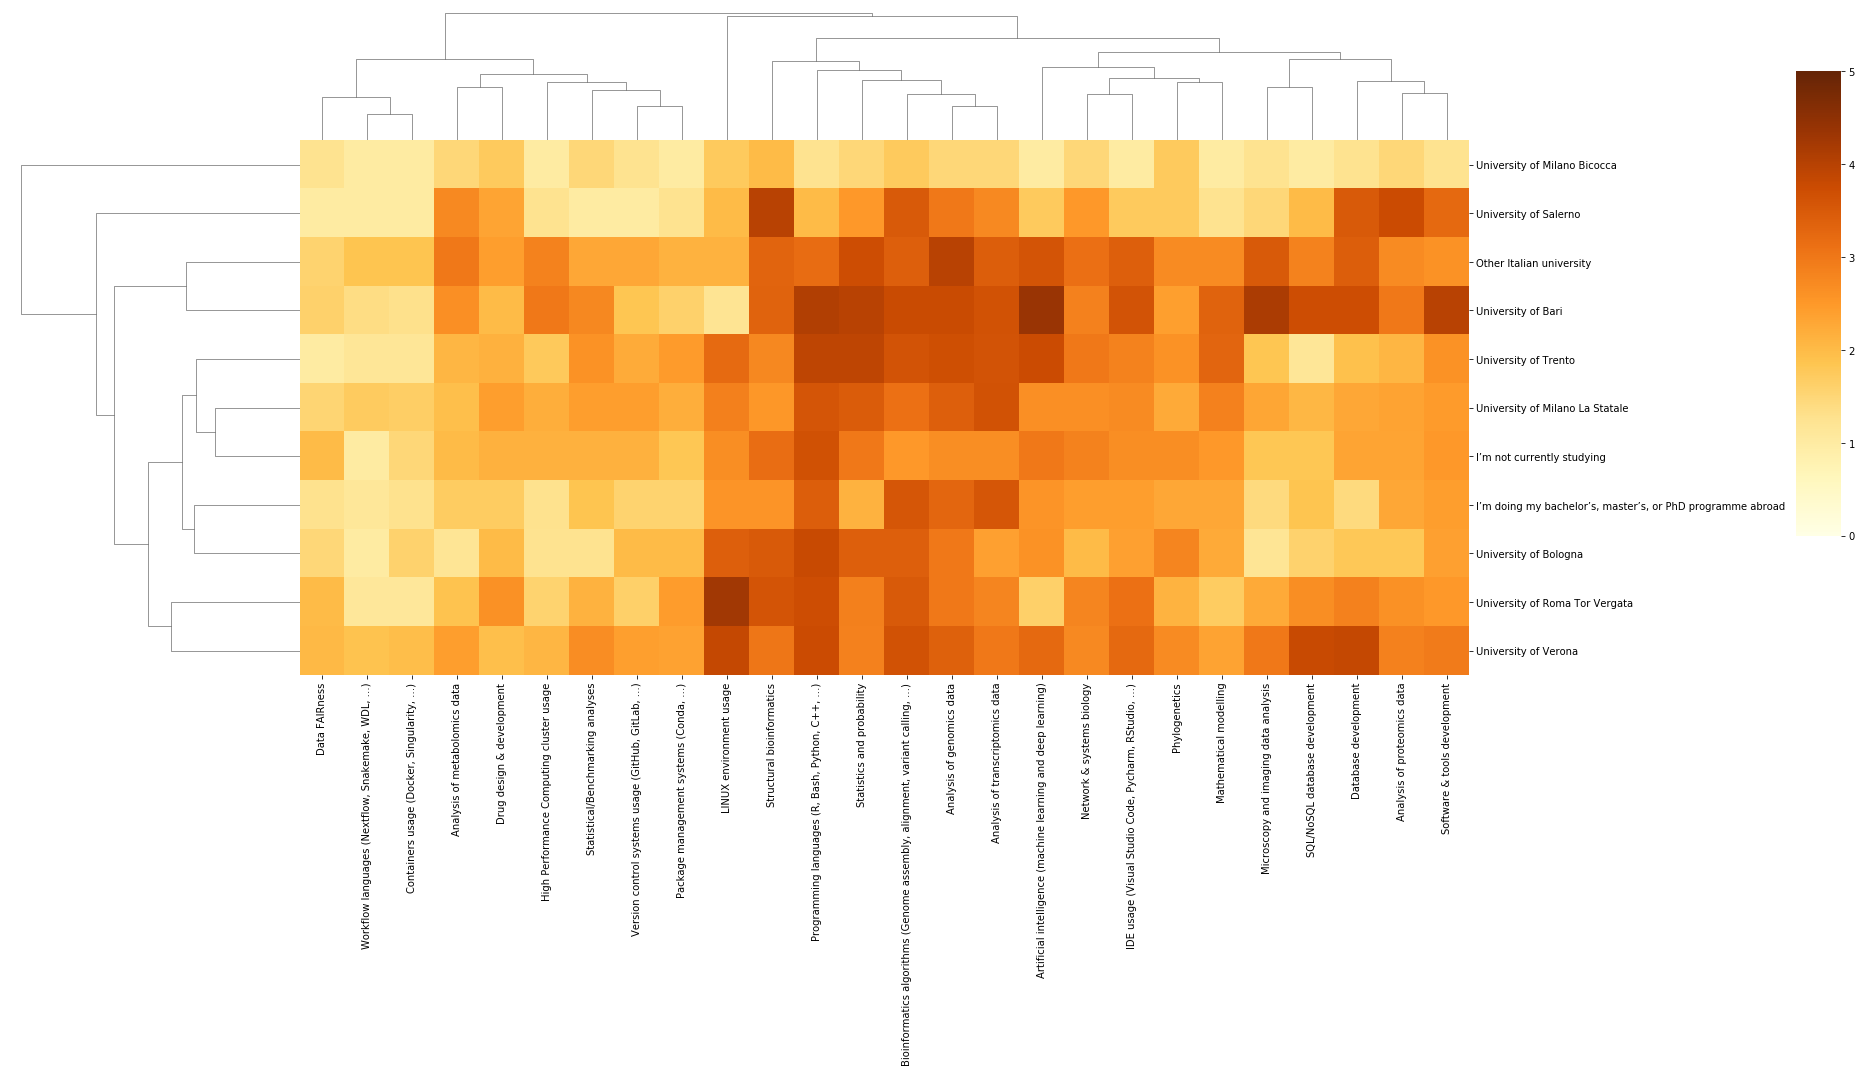

In [16]:
plot_clustermap(survey_skills_uni)

Now, we repeat the above procedure by considering the different degree classes instead of universities.

In [17]:
# remove degree class with less than 4 answers
degrees = set(survey_skills["Degree class"].tolist())
survey_skills_degree = survey_skills.copy()
survey_skills_degree = survey_skills_degree[survey_skills_degree["Degree class"].notna()]
survey_skills_degree.reset_index(drop=True, inplace=True)
survey_skills_degree.head()

,University,Degree class,"Bioinformatics algorithms (Genome assembly, alignment, variant calling, …)",Analysis of genomics data,Analysis of transcriptomics data,Analysis of proteomics data,Analysis of metabolomics data,Structural bioinformatics,Database development,Microscopy and imaging data analysis,...,SQL/NoSQL database development,High Performance Computing cluster usage,LINUX environment usage,"Version control systems usage (GitHub, GitLab, …)","Workflow languages (Nextflow, Snakemake, WDL, …)","Containers usage (Docker, Singularity, …)","Package management systems (Conda, …)","IDE usage (Visual Studio Code, Pycharm, RStudio, …)",Statistical/Benchmarking analyses,Data FAIRness
0,University of Milano La Statale,"LM-8 Biotecnologie industriali (Trento, Milano)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,University of Verona,Other,3,4,2,4,1,2,3,2,...,3,4,5,2,1,2,2,1,3,2
2,University of Trento,"LM-8 Biotecnologie industriali (Trento, Milano)",5,5,4,4,3,4,1,2,...,NaN,1,2,1,1,1,1,5,3,1
3,University of Milano La Statale,L-02 Biotecnologie (Rome La Sapienza),2,2,2,2,2,2,2,2,...,2,3,3,2,2,2,2,2,2,2
4,University of Trento,"LM-8 Biotecnologie industriali (Trento, Milano)",4,3,2,1,1,3,2,1,...,1,2,4,2,1,1,4,2,2,1


In [18]:
# compute average score per degree class
degrees = set(survey_skills_degree["Degree class"].tolist())
survey_skills_degree = pd.DataFrame(compute_average_score(survey_skills_degree, degrees, "Degree class"))
survey_skills_degree

,"LM-6 Biologia (Roma Tor Vergata, Bologna)",Other,LM-18 Informatica (Verona),L-02 Biotecnologie (Rome La Sapienza),L-31Scienze e tecnologie informatiche (Verona),LM-9 Biotecnologie mediche e farmaceutiche (Milano),"LM-8 Biotecnologie industriali (Trento, Milano)"
"Bioinformatics algorithms (Genome assembly, alignment, variant calling, …)",2.904762,3.342105,3.875000,3.333333,3.750000,2.833333,3.360000
Analysis of genomics data,2.476190,3.475000,3.312500,3.500000,3.500000,3.000000,3.520000
Analysis of transcriptomics data,2.333333,3.325000,2.866667,3.833333,3.250000,3.333333,3.600000
Analysis of proteomics data,2.473684,2.878049,2.571429,1.666667,3.250000,2.166667,2.040000
Analysis of metabolomics data,1.631579,2.414634,2.384615,1.500000,3.000000,1.833333,2.040000
Structural bioinformatics,3.050000,3.100000,3.133333,3.000000,3.500000,2.833333,2.640000
Database development,2.000000,3.292683,4.187500,1.500000,3.000000,1.833333,1.840000
Microscopy and imaging data analysis,1.526316,3.025641,3.058824,1.666667,3.250000,2.500000,1.916667
Network & systems biology,2.350000,2.780488,3.000000,3.500000,3.000000,2.500000,2.680000
Phylogenetics,2.578947,2.333333,2.500000,3.000000,3.500000,2.666667,2.291667


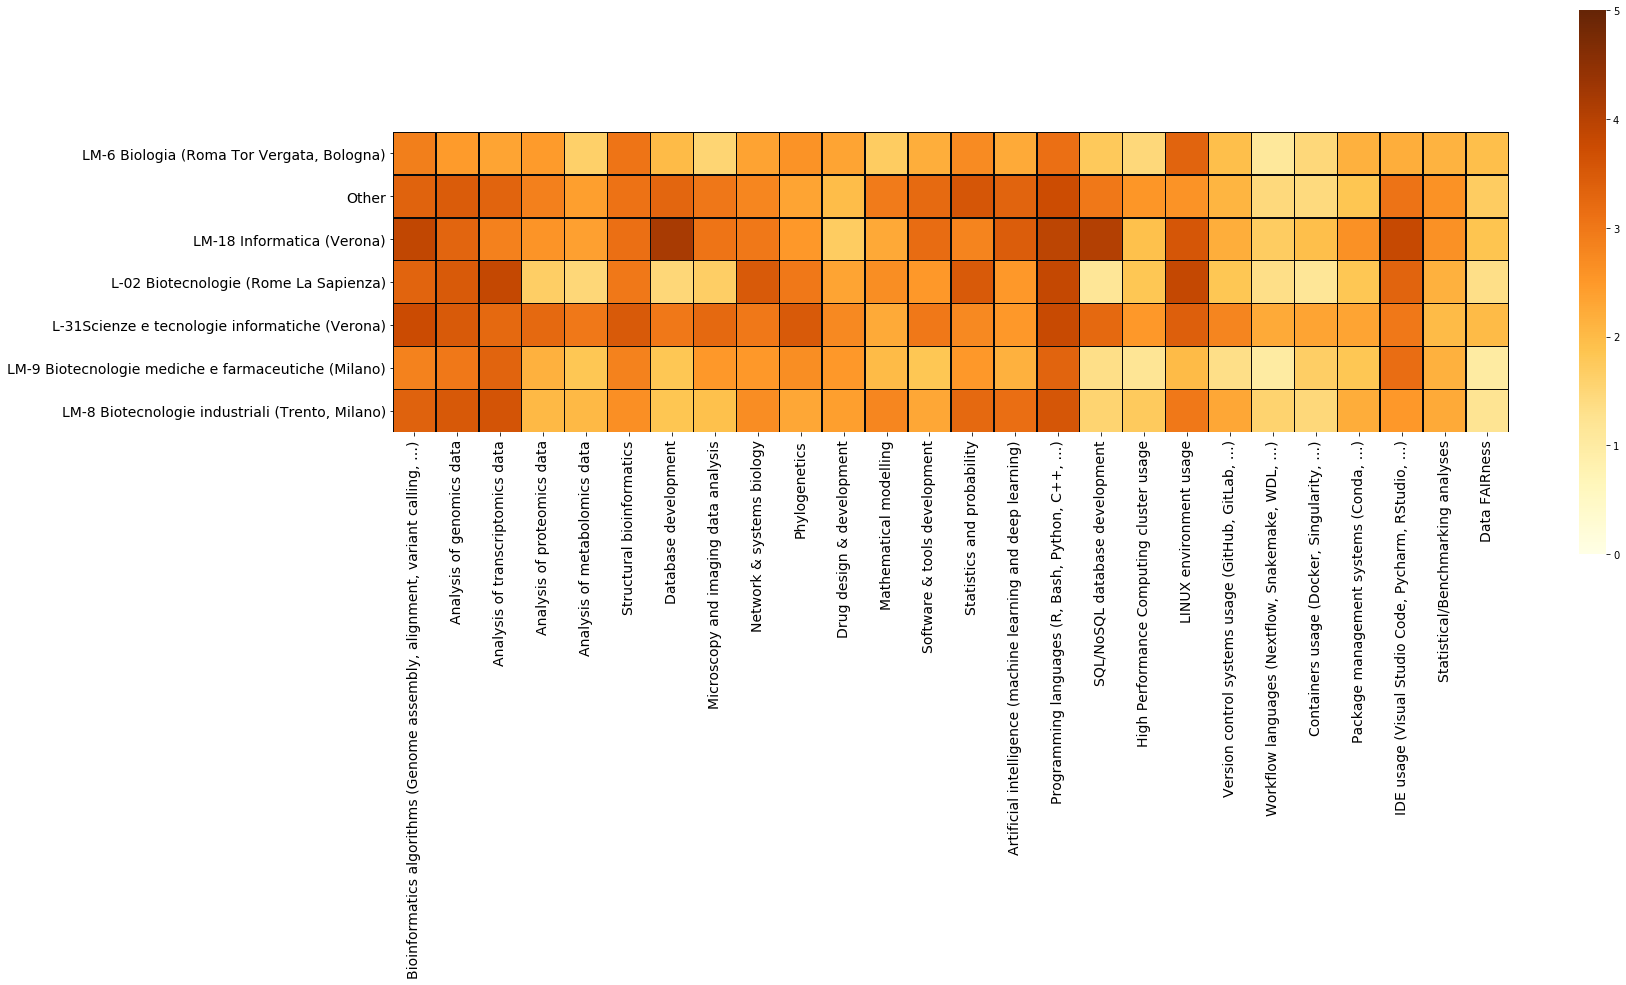

In [19]:
plot_heatmap(survey_skills_degree)

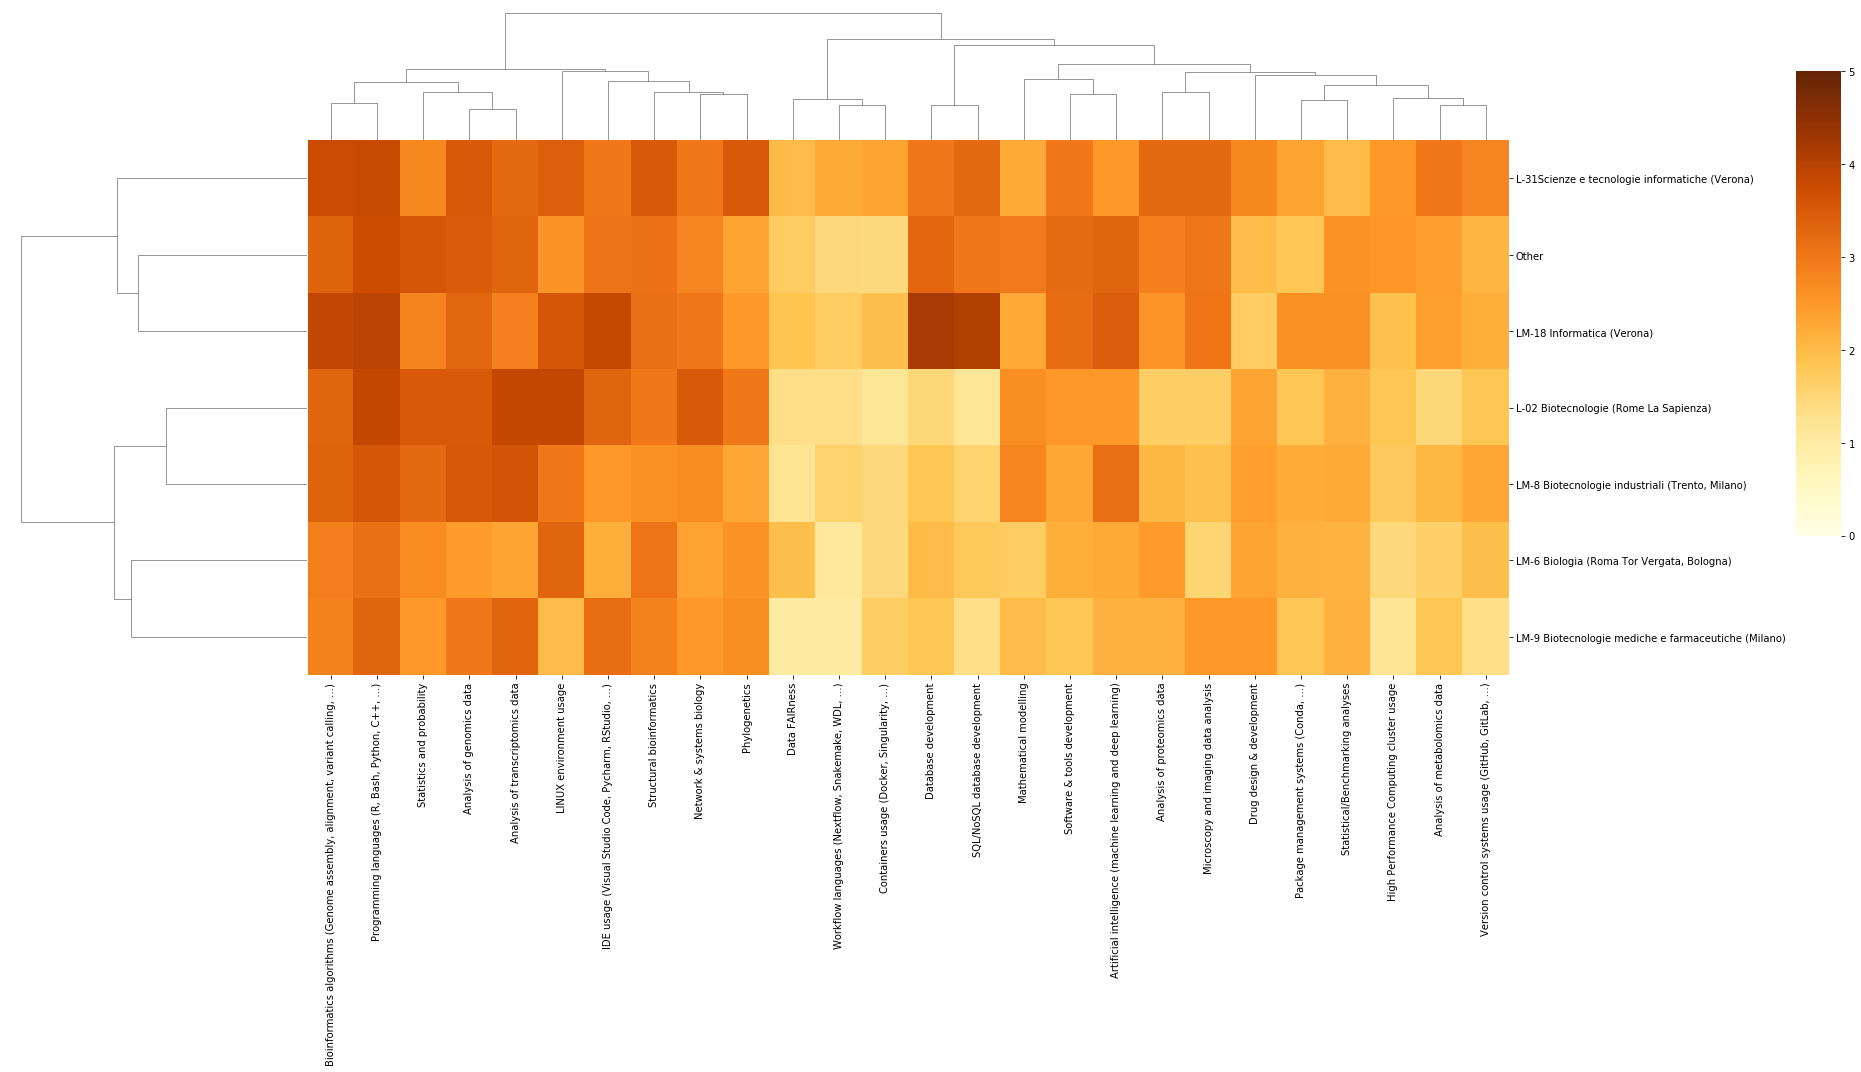

In [20]:
plot_clustermap(survey_skills_degree)

Let's now explore italian university system behave by comparing soft and hard bioinformatics skills.<br>
We begin by subsetting the complete dataset to considre only data regarding hard or soft skills (theoretical and practical, respectively).

In [21]:
# analyze subjects areas
theoretical_skills = [
    "Bioinformatics algorithms (Genome assembly, alignment, variant calling, …)",
    "Analysis of genomics data",
    "Analysis of transcriptomics data",
    "Analysis of proteomics data",
    "Analysis of metabolomics data",
    "Structural bioinformatics",
    "Microscopy and imaging data analysis",
    "Network & systems biology",
    "Phylogenetics",
    "Drug design & development",
    "Mathematical modelling",
    "Statistics and probability",
    "Artificial intelligence (machine learning and deep learning)",
    "Statistical/Benchmarking analyses",
    "Data FAIRness",
]
practical_skills = [
    "Database development",
    "Software & tools development",
    "Programming languages (R, Bash, Python, C++, …)",
    "SQL/NoSQL database development",
    "High Performance Computing cluster usage",
    "LINUX environment usage",
    "Version control systems usage (GitHub, GitLab, …)",
    "Workflow languages (Nextflow, Snakemake, WDL, …)",
    "Containers usage (Docker, Singularity, …)",
    "Package management systems (Conda, …)",
    "IDE usage (Visual Studio Code, Pycharm, RStudio, …)",
]
survey_theoretical = survey_skills[
    ["University", "Degree class"] + theoretical_skills
]
survey_practical = survey_skills[
    ["University", "Degree class"] + practical_skills
]
survey_theoretical.head()

,University,Degree class,"Bioinformatics algorithms (Genome assembly, alignment, variant calling, …)",Analysis of genomics data,Analysis of transcriptomics data,Analysis of proteomics data,Analysis of metabolomics data,Structural bioinformatics,Microscopy and imaging data analysis,Network & systems biology,Phylogenetics,Drug design & development,Mathematical modelling,Statistics and probability,Artificial intelligence (machine learning and deep learning),Statistical/Benchmarking analyses,Data FAIRness
0,University of Milano La Statale,"LM-8 Biotecnologie industriali (Trento, Milano)",NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,University of Verona,Other,3,4,2,4,1,2,2,2,3,3,3,4,2,3,2
2,University of Trento,"LM-8 Biotecnologie industriali (Trento, Milano)",5,5,4,4,3,4,2,5,4,3,5,5,5,3,1
3,University of Milano La Statale,L-02 Biotecnologie (Rome La Sapienza),2,2,2,2,2,2,2,3,3,2,3,3,2,2,2
4,University of Trento,"LM-8 Biotecnologie industriali (Trento, Milano)",4,3,2,1,1,3,1,3,4,1,3,4,5,2,1


In [22]:
survey_practical.head()  # take a look at practical dataset

,University,Degree class,Database development,Software & tools development,"Programming languages (R, Bash, Python, C++, …)",SQL/NoSQL database development,High Performance Computing cluster usage,LINUX environment usage,"Version control systems usage (GitHub, GitLab, …)","Workflow languages (Nextflow, Snakemake, WDL, …)","Containers usage (Docker, Singularity, …)","Package management systems (Conda, …)","IDE usage (Visual Studio Code, Pycharm, RStudio, …)"
0,University of Milano La Statale,"LM-8 Biotecnologie industriali (Trento, Milano)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,University of Verona,Other,3,2,4,3,4,5,2,1,2,2,1
2,University of Trento,"LM-8 Biotecnologie industriali (Trento, Milano)",1,2,4,NaN,1,2,1,1,1,1,5
3,University of Milano La Statale,L-02 Biotecnologie (Rome La Sapienza),2,3,3,2,3,3,2,2,2,2,2
4,University of Trento,"LM-8 Biotecnologie industriali (Trento, Milano)",2,3,4,1,2,4,2,1,1,4,2


Now we compute the overall average score for theoretical and practical skills. These values will be successively used as a meter of comaparison to evaluate how italian universities and degree classes, behaves with respect to the average level.

In [23]:
# compute overall mean
survey_theoretical_np = survey_theoretical[
    theoretical_skills
].to_numpy().astype(float)
survey_theoretical_np = survey_theoretical_np[
    np.logical_not(np.isnan(survey_theoretical_np))
]
avg_score_theoretical = survey_theoretical_np.mean()
avg_score_theoretical  # 2.68

2.6818443804034584

In [24]:
survey_practical_np = survey_practical[
    practical_skills
].to_numpy().astype(float)
survey_practical_np = survey_practical_np[
    np.logical_not(np.isnan(survey_practical_np))
]
avg_score_practical = survey_practical_np.mean()
avg_score_practical  # 2.45

2.4461054287962236

Let's now compute the average score of hard and soft skills for each university and for each degree class considered in our study.

In [25]:
# compute mean by university
uni_theoretical_avgs = compute_mean_by_value(
    survey_theoretical, universities, "University", theoretical_skills
)
uni_practical_avgs = compute_mean_by_value(
    survey_practical, universities, "University", practical_skills
)
# compute mean by degree class
degree_theoretical_avgs = compute_mean_by_value(
    survey_theoretical, degrees, "Degree class", theoretical_skills
)
degree_practical_avgs = compute_mean_by_value(
    survey_practical, degrees, "Degree class", practical_skills
)

We now plot how each university behaves in practical and theoretical skills.

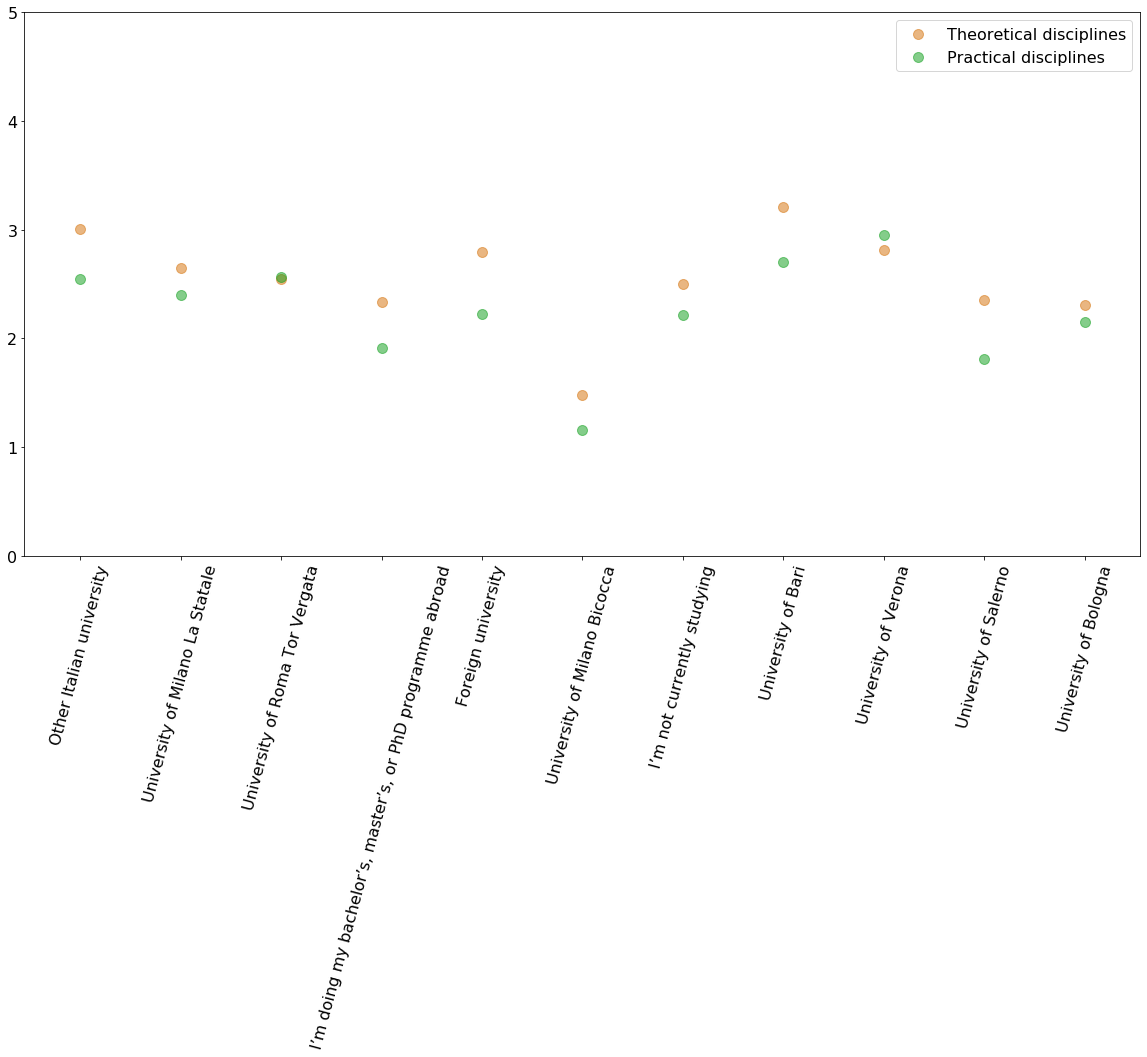

In [26]:
# skills scores by university
plot_scatter_unique(uni_theoretical_avgs, uni_practical_avgs, change=True)

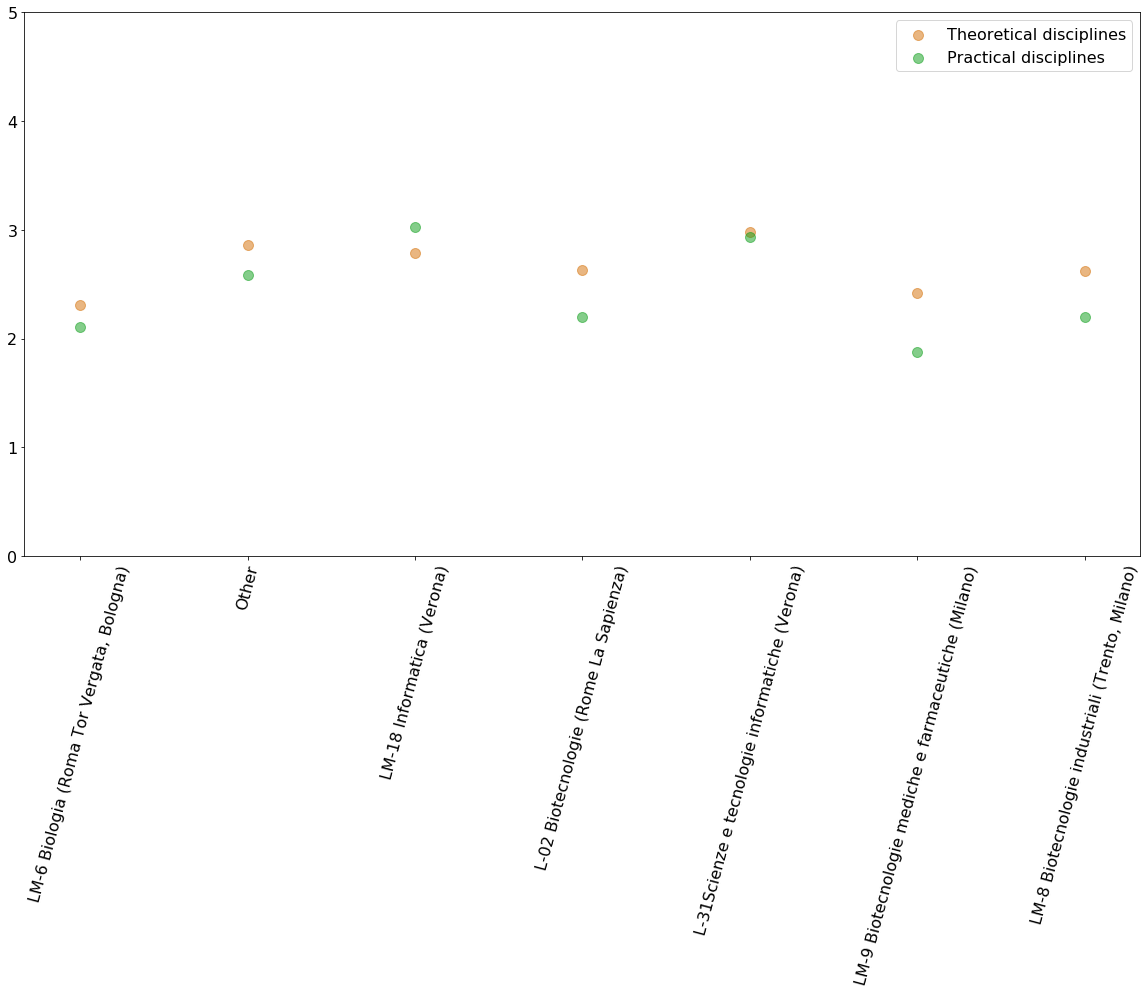

In [27]:
# skills scores by degree class
plot_scatter_unique(degree_theoretical_avgs, degree_practical_avgs)

Now we compare how each university behaves in teaching theoretical skills, with respect to the overall average score. 

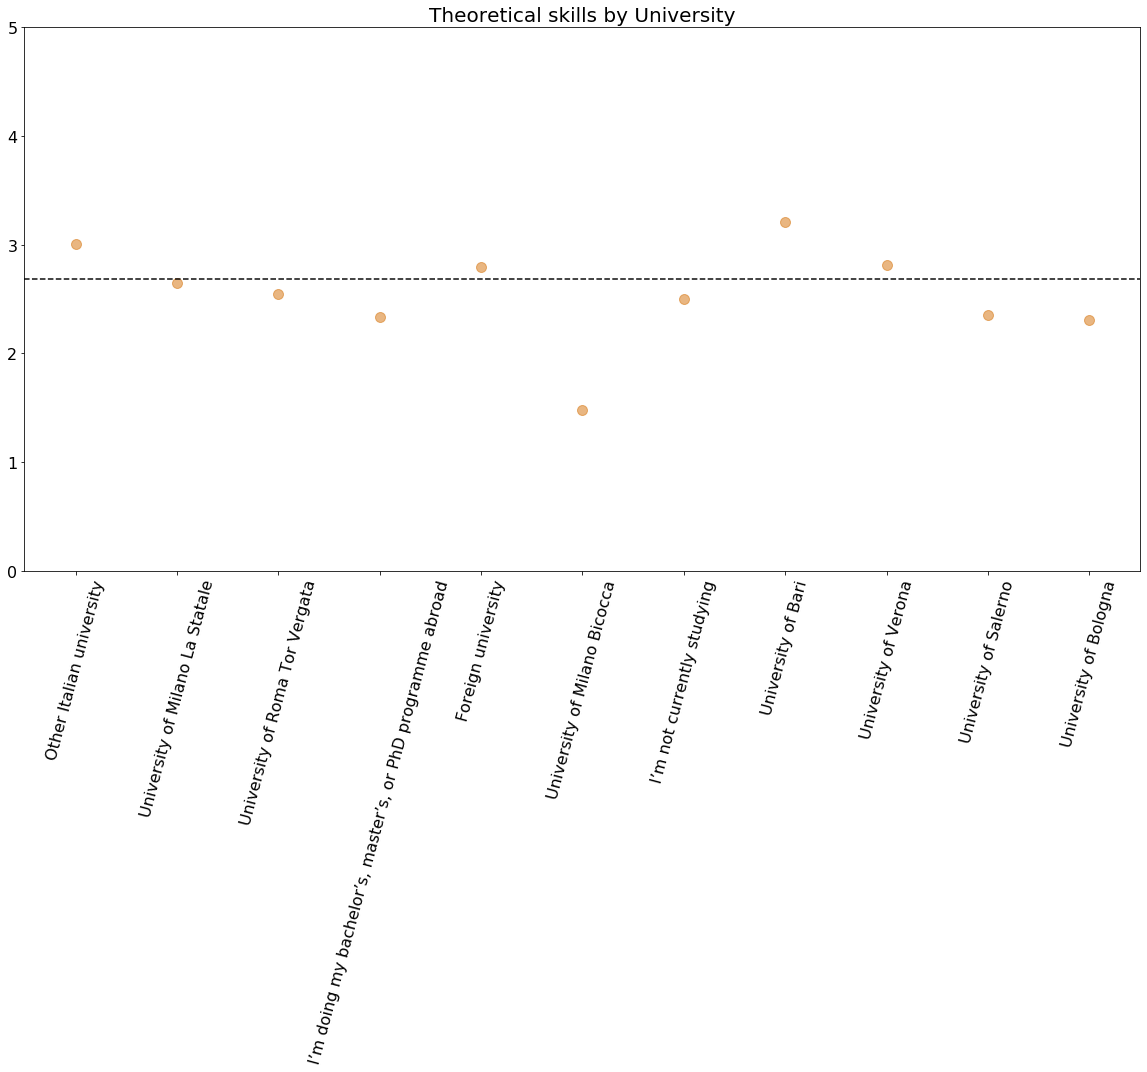

In [28]:
# theoretical skills by university
scatter_plot_single(
    uni_theoretical_avgs, 
    avg_score_theoretical, 
    "Theoretical skills by University", 
    change=True
)

Let's do the same by considering practical skills.

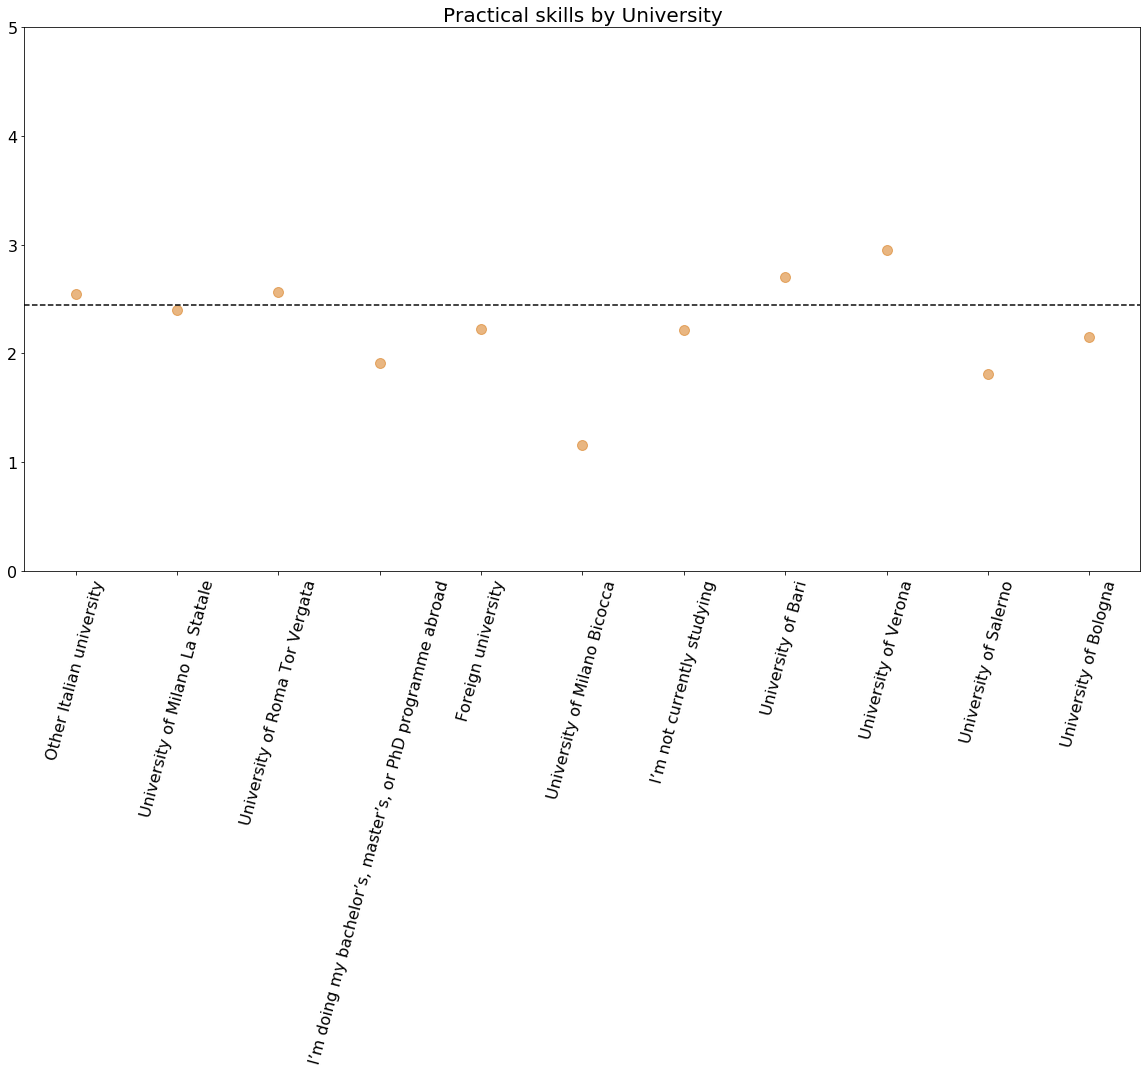

In [29]:
# practical skills by university
scatter_plot_single(
    uni_practical_avgs, 
    avg_score_practical, 
    "Practical skills by University", 
    change=True
)

Let's now repeat the same analysis on degree classes.

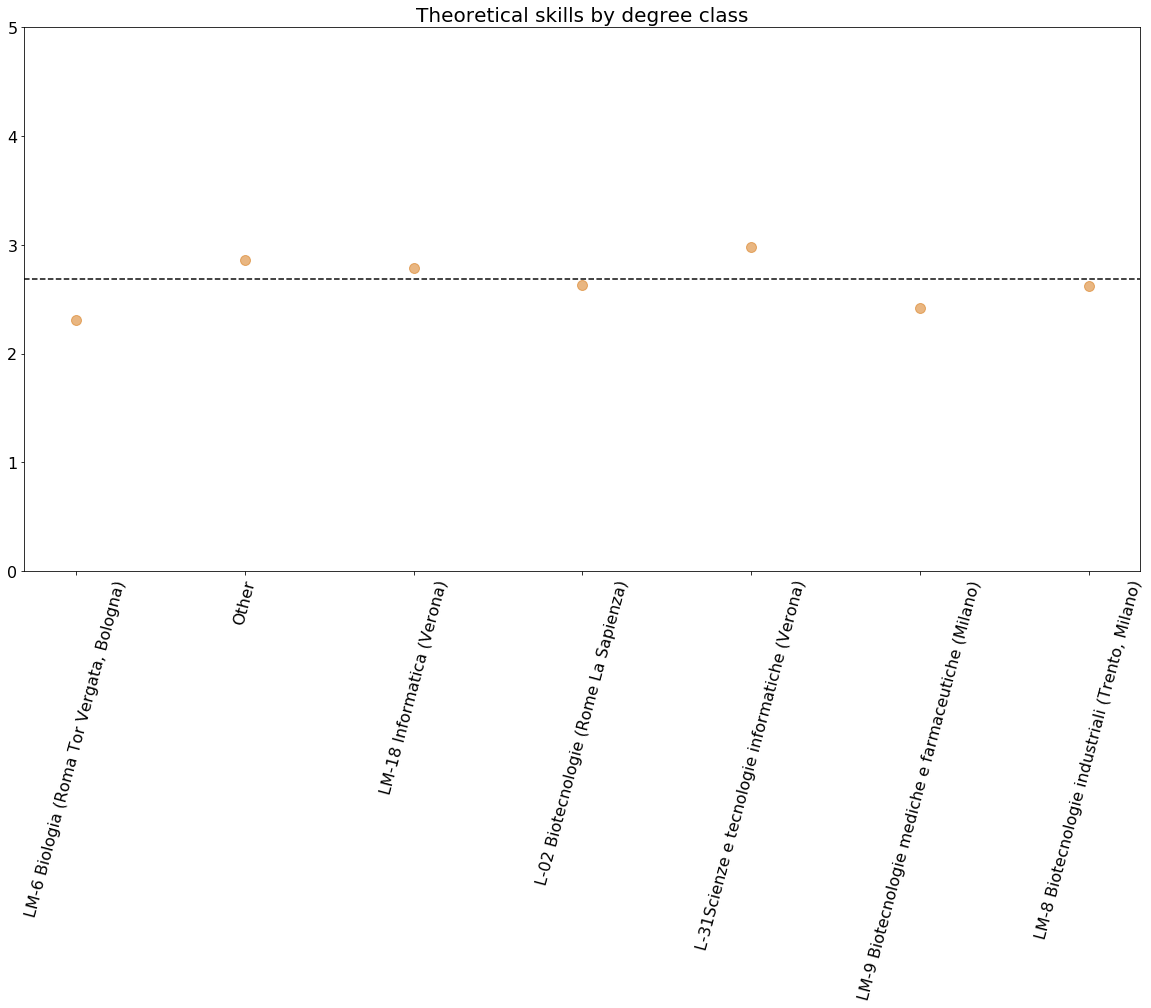

In [30]:
# theoretical skills by degree class
scatter_plot_single(
    degree_theoretical_avgs,
    avg_score_theoretical,
    "Theoretical skills by degree class"
)

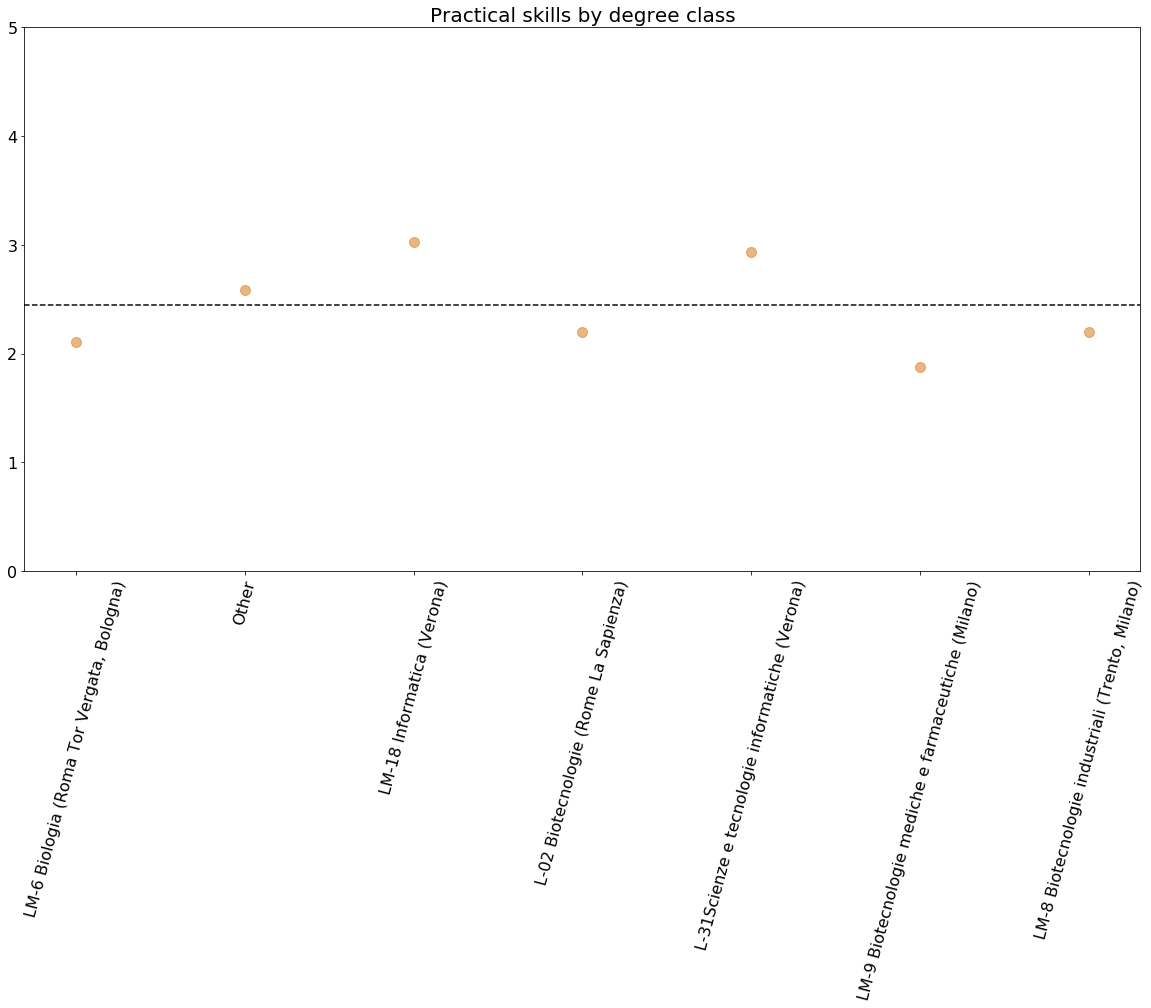

In [31]:
# practical skills by degree class
scatter_plot_single(
    degree_practical_avgs,
    avg_score_practical,
    "Practical skills by degree class"
)